# Introducción a la probabilidad

**Autora**: Camila Rangel Smith (@crangelsmith en Github).

**Nota**: Este notebook está basado en [esta página](https://www.dataquest.io/blog/basic-statistics-in-python-probability/) con modificaciones específicas para esta práctica. 

## Probabilidad usando monedas

La representación por excelencia de la probabilidad es el lanzamiento de una moneda. En un lanzamiento de moneda los únicos eventos que pueden ocurrir son:

- Lanzar una cara
- Lanzar una cruz

Estos dos sucesos forman el espacio muestral, el conjunto de todos los sucesos posibles que pueden ocurrir. 
Para calcular la probabilidad de que ocurra un suceso, contamos cuántas veces puede ocurrir el suceso que nos interesa (por ejemplo, que salga cara) y lo dividimos entre el espacio muestral. 
Así, la probabilidad nos dirá que una moneda ideal tendrá una probabilidad de 1 entre 2 de salir cara o cruz. 
Al observar los sucesos que pueden ocurrir, la probabilidad nos da un marco para hacer predicciones sobre la frecuencia con la que ocurrirán los sucesos. 
Sin embargo, aunque parezca obvio, si realmente intentamos lanzar algunas monedas, es probable que de vez en cuando obtengamos un número anormalmente alto o bajo de caras. 
Si no queremos hacer la suposición de que la moneda es justa, ¿qué podemos hacer? Podemos recopilar datos. Podemos utilizar la estadística para calcular las probabilidades a 
partir de las observaciones del mundo real y comprobar cómo se comparan con el ideal.

## De la estadística a la probabilidad

Generaremos datos lanzando una moneda 10 veces y contando cuántas veces sale cara. Llamaremos ensayo a un conjunto de n lanzamientos de moneda (donde n es una variable que daremos). Nuestro dato será el número de caras que observemos. Puede que no obtengamos las 5 caras "ideales", pero no nos preocuparemos demasiado, ya que un ensayo es sólo un punto de datos. Si realizamos muchos, muchos ensayos, esperamos que el número medio de cabezas en todos nuestros ensayos se acerque al 50%. El código siguiente simula 10, 100, 1000 y 1000000 ensayos, y luego calcula la proporción media de cabezas observada. Nuestro proceso se resume también en la imagen de abajo.


In [1]:
import random

def lanzar_moneda(n):
    cara = 0
    for i in range(n):
        if random.random() <= 0.5:
            cara +=1      
    return cara/n

La función `lanzar_moneda` es la que representa una simulación de 'n' lanzamientos de moneda.
Utiliza la función random() para generar un flotador entre 0 y 1, e incrementa nuestra cuenta de cabezas si está dentro de la mitad de ese rango. 
La función regresa la división entre el numero de caras que ha obtenido, y el numero de veces que lanzamos la moneda. 

In [2]:
print ('Al lanzar la moneda 10 veces, la proporcion de vece que obtuvimos cara: ',lanzar_moneda(10))
print()
print ('Al lanzar la moneda 100 veces, la proporcion de vece que obtuvimos cara: ',lanzar_moneda(100))
print()
print ('Al lanzar la moneda 1000 veces, la proporcion de vece que obtuvimos cara: ',lanzar_moneda(1000))
print()
print ('Al lanzar la moneda 1000000 veces, la proporcion de vece que obtuvimos cara: ',lanzar_moneda(1000000))

Al lanzar la moneda 10 veces, la proporcion de vece que obtuvimos cara:  0.5

Al lanzar la moneda 100 veces, la proporcion de vece que obtuvimos cara:  0.5

Al lanzar la moneda 1000 veces, la proporcion de vece que obtuvimos cara:  0.517

Al lanzar la moneda 1000000 veces, la proporcion de vece que obtuvimos cara:  0.499648


A continuación, la funcion `experimentos` repite estos ensayos de lanzar la moneda unas 100 veces el número de veces que queramos, devolviendo el número medio de cabezas en cada ensayo. 

In [3]:
def experimentos(n,n_lanzamientos):
    experimento = []
    for i in range(n):
        experimento.append(lanzar_moneda(n_lanzamientos))
    return (experimento)

Las simulaciones de lanzamiento de monedas nos dan algunos resultados interesantes.

En primer lugar, los datos confirman que nuestro número medio de caras se aproxima a lo que la probabilidad sugiere que debería ser. Además, esta media mejora con más ensayos. En este ejemplo cada ensayo produce una única estimación de lo que la probabilidad sugiere que debería ocurrir. La llamamos estimación porque sabemos que no será perfecta (es decir, no obtendremos 50% caras todas las veces).

Con 10 experimentos, valor medio: 0.5 desviación estandar: 0.1247219128924647

Con 100 experimentos, valor medio: 0.506 desviación estandar: 0.14129273287623947

Con 1000 experimentos, valor medio: 0.5046 desviación estandar: 0.16007643319509735

Con 100000 experimentos, valor medio: 0.500633 desviación estandar: 0.15795932648149721


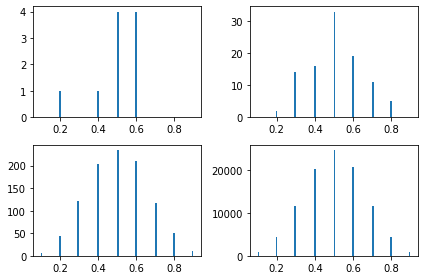

In [4]:
import matplotlib.pyplot as plt
from statistics import mean, stdev 

n_lanzamientos = 10

ex_10 = experimentos(10, n_lanzamientos)
ex_100 = experimentos(100, n_lanzamientos)
ex_1000 = experimentos(1000, n_lanzamientos)
ex_100000 = experimentos(100000, n_lanzamientos)


n_bins = 100
fig, axs = plt.subplots(2, 2, tight_layout=True)
axs[0,0].hist(ex_10, bins=n_bins, range=[0.1,0.9] )
axs[0,1].hist(ex_100, bins=n_bins, range=[0.1,0.9])
axs[1,0].hist(ex_1000, bins=n_bins, range=[0.1,0.9])
axs[1,1].hist(ex_100000, bins=n_bins, range=[0.1,0.9])

print ('Con 10 experimentos, valor medio:',mean(ex_10), 'desviación estandar:', stdev(ex_10))
print()
print ('Con 100 experimentos, valor medio:',mean(ex_100), 'desviación estandar:', stdev(ex_100))
print()
print ('Con 1000 experimentos, valor medio:',mean(ex_1000), 'desviación estandar:', stdev(ex_1000))
print()
print ('Con 100000 experimentos, valor medio:',mean(ex_100000), 'desviación estandar:', stdev(ex_100000))


En 10 ensayos, hay un ligero error, pero este error desaparece casi por completo con 1.000.000 experimentos. 

A medida que tenemos más ensayos, la desviación de la media disminuye. Seguro que podríamos haber lanzado la moneda nosotros mismos, pero Python nos ahorra mucho tiempo al permitirnos modelar este proceso en código. A medida que obtenemos más y más datos, el mundo real empieza a parecerse al ideal.

## Preguntas

- ¿Qué distribución obserbamos en las estimaciones de estos experimentos? ¿Cual es la razón de que todos sigan esta distribución?
- A medida que tenemos más ensayos, la desviación de la media con respecto al valor real disminuye. ¿Qué pasa con la desviación estandar?
- ¿Cómo se veria una figura que grafique el valor medio y desviación estandar como función del numero de ensayos?
- ¿Como simulamos una monda trucada?
- ¿Como simulamos el resultado de lanzar dos monedas? E.g probabilidad de tener dos caras.

## Ensayos de Bernulli

Lanzar una moneda tiene dos resultados posibles. Este sencillo experimento, denominado ensayo de Bernoulli, se modela mediante una variable aleatoria denominada Bernoulli. Entender este bloque de construcción nos puede llevar lejos. Podemos utilizarlo para construir modelos más complejos.

Python tiene su propia librerias para simular ensayos de Bernulli dato un numero de lanzamientos y una probabilidad. 
Para obtener el resultado de 15 ensayos Bernoulli con una probabilidad de éxito igual a 0,5 (una moneda justa), escribimos



In [5]:
from scipy.stats import bernoulli
bernoulli.rvs(size=15,p=0.5)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## Ejercicios

Los siguientes ejercicios deben ser realizados durante la sesión practica. Lo ideal seria hacer el calculo de la probabilidad, simular los experimentos y comparar los resultados. Para las simulaciones podemos usar las funciones definidas antes e implementar algunas modificaciones.

Los ejercicios están basados en el siguiente escenario:

*Tenemos 3 monedas en una bolsa, una moneda está trucada (99% de probabilidad de salir sello al lanzarse), las otras dos son monedas normales.*


1. El experimento consiste en  alatoreamente sacar una moneda de la bolsa, lanzarla, anotar el resultado y volver a introducir la moneda en la bolsa. Repites esta acción hasta haber lanzado monedas unas 21 veces. Preguntas:

    - Estimar cuantas caras esperas obtener al terminar el experimento. 
    - Simular 100 experimentos para estimar cuantas caras esperas obtener en un experimento.  
    - Estimar qué desviación esperas entre experimento y experimento. 

2. El experimento consiste en alatoreamente sacar una moneda de la bolsa, lanzarla, y luego sacar las dos monedas que quedan en la bolsa, lanzarlas y anotar los resultado
 Repites esta acción hasta haber lanzado monedas unas 21 veces. Preguntas:

    - ¿En qué sentido este ejemplo es distinto a 1?
    - Simular 100 experimentos para estimar cuantas caras esperas obtener en un experimento.  
    - Estimar qué desviación esperas entre experimento y experimento. 

3. Sacamos la primera moneda. 
    - ¿Cual es la probabilidad que sea una moneda truncada? 
    - Ahora la lanzamos y nos sale sello. Con esta información, ¿cual es la probabilidad que sea una moneda truncada? 
    